# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [6]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [7]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [8]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [9]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [10]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [11]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [12]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [13]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [14]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset_completo = pd.concat([data_2019, data_2018, data_2017])
df_completo = pd.DataFrame(dataset_completo)
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [15]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como horaÇ
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [16]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [17]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01
1,Domingo,Provincia,Liviano,9,2017-01-01
2,Domingo,Provincia,Liviano,644,2017-01-01
3,Domingo,Provincia,Pesado,6,2017-01-01
4,Domingo,Provincia,Pesado,1,2017-01-01


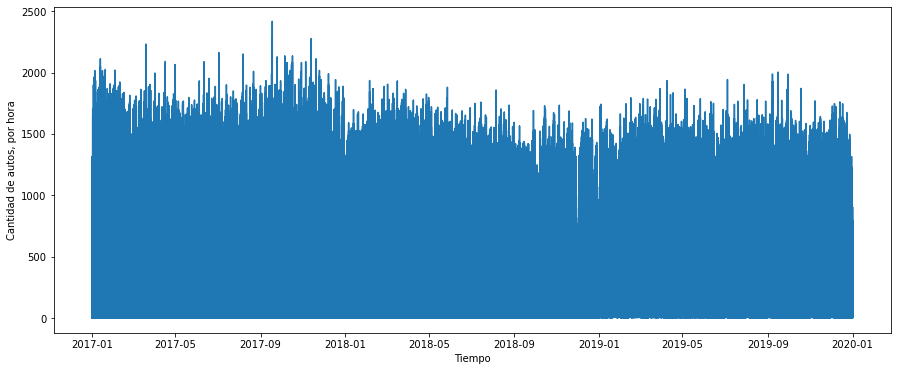

In [18]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [30]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


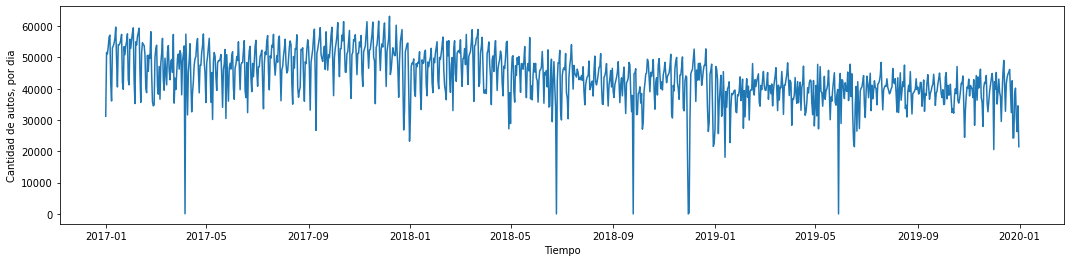

In [31]:
plt.figure(figsize = (18,4))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

## 1. Analisis Exploratorio de datos

In [21]:
diario.reset_index(inplace=True)

In [22]:
serie_copia = diario.copy()
serie_copia.head()

,fecha,cantidad_pasos
0,2017-01-01,31183
1,2017-01-02,51568
2,2017-01-03,51093
3,2017-01-04,53332
4,2017-01-05,56486


Al resampleo diario agregamos algunas columnas que nos servirán para explorar de mejor manera los datos

In [170]:
serie_copia['año']=serie_copia.fecha.dt.year
serie_copia['mes']=serie_copia.fecha.dt.month
serie_copia['dia']=serie_copia.fecha.dt.day

In [171]:
serie_copia.head()

,fecha,cantidad_pasos,año,mes,dia
0,2017-01-01,31183,2017,1,1
1,2017-01-02,51568,2017,1,2
2,2017-01-03,51093,2017,1,3
3,2017-01-04,53332,2017,1,4
4,2017-01-05,56486,2017,1,5


### ¿Cual es el tamaño del dataset?
El dataset resampleado por día tiene 1095 instancias y 5 columnas

In [172]:
serie_copia.shape

(1095, 5)

In [173]:
serie_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha           1095 non-null   datetime64[ns]
 1   cantidad_pasos  1095 non-null   int64         
 2   año             1095 non-null   int64         
 3   mes             1095 non-null   int64         
 4   dia             1095 non-null   int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 42.9 KB


### ¿Cual es el año en que más autos pasaron?
El año en que más autos pasaron por la autopista Illia pagando en efectivo fue en 2017, con un total de 17.783.512

Text(0.5, 1.0, 'Cantidad de pasos por año')

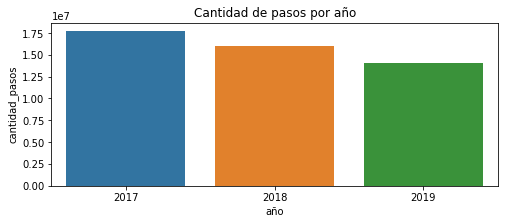

In [176]:
plt.figure(2, figsize=(8, 3))
sns.barplot(data=serie_copia, x='año', y='cantidad_pasos', estimator=sum, ci=False)
plt.title('Cantidad de pasos por año')

### ¿Como es la tendencia de pasos por año y mes?
1. En 2017 se observa un tendencia al alza con el paso de los meses.
2. En 2018 se observa una tendecia a la baja.
3. En 2019 se observa estabilidad en el mes a mes, sin embargo, la cantidad de pasos es inferior a los años anteriores

Text(0.5, 1.0, 'Cantidad de pasos por año y por mes')

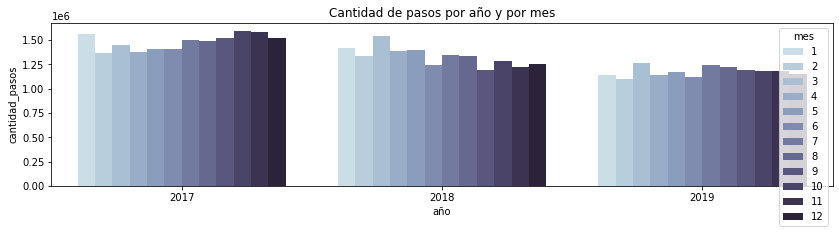

In [44]:
plt.figure(2, figsize=(14, 3))
sns.barplot(data=serie_copia, x='año', y='cantidad_pasos',hue='mes', palette= "ch:s=.25,rot=-.25",estimator=sum, ci=False)
plt.title('Cantidad de pasos por año y por mes')

### ¿Cual es el día con mayor cantidad de pasos?
En el siguiente gráfico, se observa que el viernes es el día con mayor cantidad de registros en el dataset, puede ser el día en que mayor cantidad de autos pasan.

Text(0.5, 1.0, 'Cantidad de pasos por día de la semana')

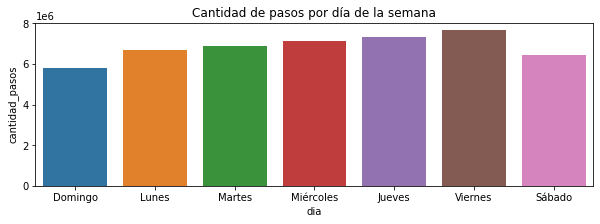

In [178]:
plt.figure(2, figsize=(10, 3))
sns.barplot(data=dataset, x='dia', y='cantidad_pasos', estimator=sum, ci=False)
plt.title('Cantidad de pasos por día de la semana')

### ¿En que sentido se dirigen más autos?
En el acumulado de la cantidad de pasos, podemos observar que la mayor parte de los autos se dirigen hacia el centro de Buenos Aires, sin embargo, la diferencia no es muy amplia.

In [200]:
dataset['año']=dataset.fecha.dt.year

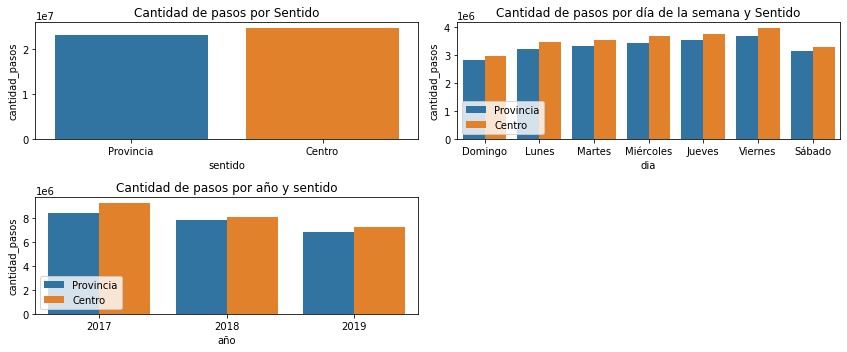

In [201]:
plt.figure(2, figsize=(12, 5))

plt.subplot(2,2,1)
sns.barplot(data=dataset, x='sentido', y='cantidad_pasos', estimator=sum, ci=False)
plt.title('Cantidad de pasos por Sentido')

plt.subplot(2,2,2)
sns.barplot(data=dataset, x='dia', y='cantidad_pasos', estimator=sum, hue='sentido', ci=False)
plt.title('Cantidad de pasos por día de la semana y Sentido')
plt.legend(loc='best')

plt.subplot(2,2,3)
sns.barplot(x="año", y="cantidad_pasos", hue="sentido", data=dataset, estimator=sum, ci=False)
plt.title('Cantidad de pasos por año y sentido')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

### ¿Que tipo de vehiculo es el que más recurrente?
El tipo de vehiculo que más transita por esta autpista es el Liviano, en promedio es el 97% del total vehiculos. El tipo de vehicolo pesado cada año tiene menor cantidad de pasos.

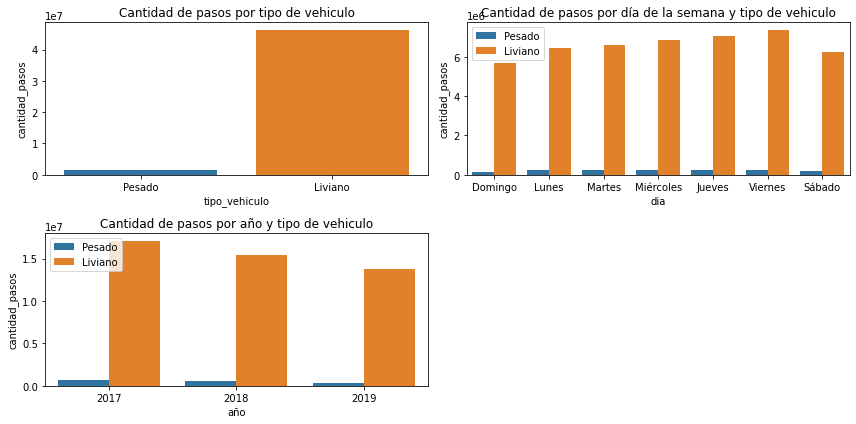

In [182]:
plt.figure(2, figsize=(12, 6))

plt.subplot(2,2,1)
sns.barplot(data=dataset, x='tipo_vehiculo', y='cantidad_pasos', estimator=sum, ci=False)
plt.title('Cantidad de pasos por tipo de vehiculo')

plt.subplot(2,2,2)
sns.barplot(x="dia", y="cantidad_pasos", hue="tipo_vehiculo", data=dataset, estimator=sum, ci=False)
plt.title('Cantidad de pasos por día de la semana y tipo de vehiculo')
plt.legend(loc='best')

plt.subplot(2,2,3)
sns.barplot(x="año", y="cantidad_pasos", hue="tipo_vehiculo", data=dataset, estimator=sum, ci=False)
plt.title('Cantidad de pasos por año y tipo de vehiculo')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [183]:
dataset_t = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Telepase
mask_t = np.logical_and(dataset_t.estacion=='Illia', dataset_t.forma_pago == 'TELEPASE')
dataset_t = dataset_t[mask_t]

#Quitamos las columnas que no vamos a utilizar
dataset_t.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_t['fecha2'] = pd.to_datetime(dataset_t.fecha) + pd.to_timedelta(dataset_t.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_t.drop(columns=['fecha','hora_fin'], inplace = True)

dataset_t.rename(columns = {'fecha2':'fecha'}, inplace = True)

#Reordenamos el dataset por fecha
dataset_t.sort_values('fecha', inplace = True)
dataset_t.reset_index(drop=True, inplace = True)

#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_t = dataset_t.resample('D', on = 'fecha').sum()
print(diario_t.shape)
diario_t.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,12326
2017-01-02,35621
2017-01-03,39390
2017-01-04,40294
2017-01-05,41373


### Si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
En la siguiente gráfica se puede observar que a medida que avanza el tiempo, el pago con efectivo tiene una tendencia negativa, pero a su vez, el paso con Telepase tiene una tendencia positiva, por lo que puede suceder que se esté produciendo una migración entre tipos de pago. Solo observando la serie de efectivo, no podemos asegurar que la tendencia total de la cantidad de pasos es negativa.

<function matplotlib.pyplot.show(close=None, block=None)>

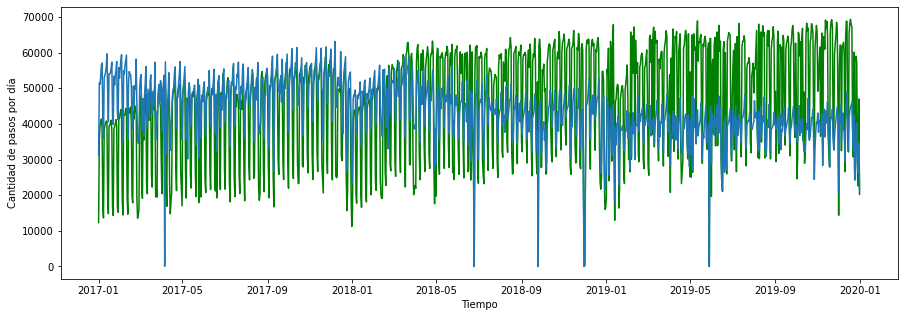

In [197]:
plt.figure(figsize=(15,5))
plt.plot(diario_t.index, diario_t.cantidad_pasos,c='g')
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos por día')
plt.show

### 1.1 Valores Faltantes

Se verifica que no existan valores nulos o n/a, que pueda afectar el resultado de los modelos.

In [81]:
dataset.isnull().sum()

dia               0
sentido           0
tipo_vehiculo     0
cantidad_pasos    0
fecha             0
año               0
dtype: int64

In [82]:
dataset.isna().sum()

dia               0
sentido           0
tipo_vehiculo     0
cantidad_pasos    0
fecha             0
año               0
dtype: int64

Verifico que no existan fechas faltantes en el dataset

In [23]:
dataset_copia=dataset.copy()
dataset_copia['fecha_rev'] = dataset_copia.index.to_series().diff()
dataset_copia.fecha_rev.value_counts()

1.0    238868
Name: fecha_rev, dtype: int64

Por las anteriores validaciones, podemos concluir que no hay valores faltantes en el dataset filtrado

### 1.2 Valores atipicos

In [24]:
diario.describe().T

,count,mean,std,min,25%,50%,75%,max
cantidad_pasos,1095.0,43712.859361,8192.736927,0.0,39061.5,43761.0,49498.0,63127.0


Al observar la información estadistica de la celda anterior, se encuentra que existen algunos valores que en cantidad de pasos son iguales a 0, lo que puede corresponder a valores atipicos y estos pueden influir en el resultado de las predicciones de los modelos.

Text(0.5, 1.0, 'cantidad_pasos')

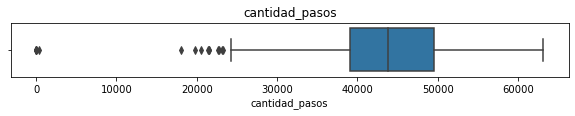

In [25]:
plt.figure(2, figsize=(10, 1))
sns.boxplot(x=diario['cantidad_pasos'])
plt.title('cantidad_pasos')

Con el boxplot anterior, se puede observar que el dataset tiene algunos valores en cero y adicionalmente hay un conjunto de valores que están al rededor de los 20.000 pasos

In [26]:
diario[diario.cantidad_pasos<=20000].sort_values(by='cantidad_pasos')

,fecha,cantidad_pasos
540,2018-06-25,0
632,2018-09-25,0
698,2018-11-30,0
878,2019-05-29,0
95,2017-04-06,40
699,2018-12-01,350
742,2019-01-13,18076
697,2018-11-29,19728


Buscando información adicional sobre el porqué algunos días no registran pasos de vehiculos, se encuentra que en algunos de estos días se presentó algúna alteración de orden publico, que impidió que se registraran pasos.
1. 2018-06-25 = Paro Nacional
2. 2018-09-25 = Paro Nacional

Se reemplazan los valores identificados como outliers y se aplica una interpolación para hallar un valor que sea representativo y ayude al modelo a predecir mejor.

In [32]:
diario.cantidad_pasos[diario.cantidad_pasos < 20000] = np.nan
diario = diario.interpolate()

teniendo en cuenta que la cantidad de vehiculos es una variable discreta y la interpolación al tratarse de un promedio puede arrojar decimales, se aplica un redondeo para que todos los valores queden enteros.

In [33]:
decimals = 0   
diario['cantidad_pasos'] = diario['cantidad_pasos'].apply(lambda x: round(x, decimals))

Verificamos un indice que en el dataset original aprecía en 0, para observar el valor que fue asignado por la interpolación

In [34]:
diario[diario.index =='2018-06-25']

,cantidad_pasos
fecha,
2018-06-25,38312.0


Graficamos de nuevo la serie resampleada por día, para observar que en efecto ya no aparezcan los outliers.

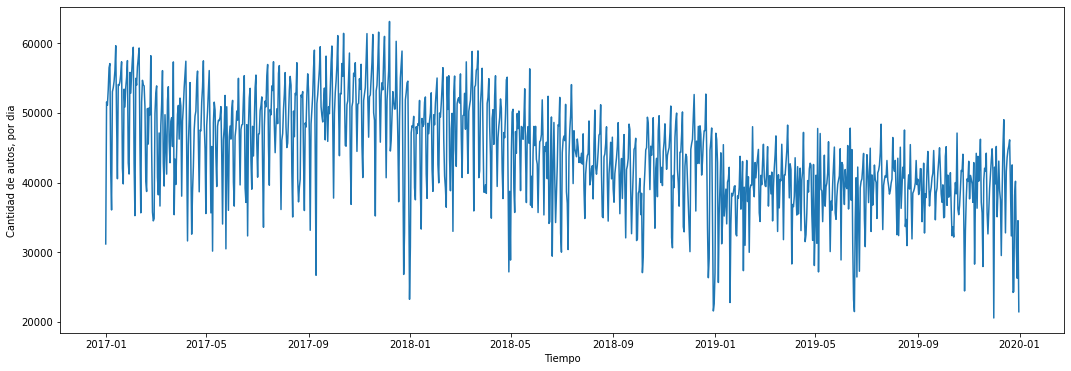

In [35]:
plt.figure(figsize = (18,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

## 2. Componentes de la Serie

In [91]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(diario.cantidad_pasos, model='additive')

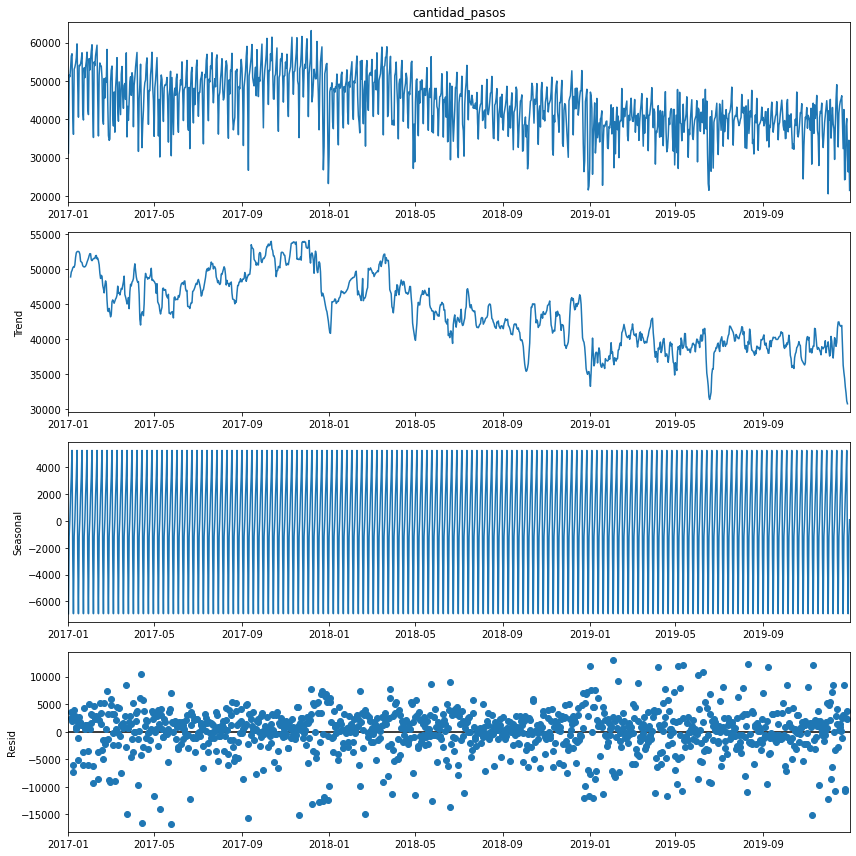

In [92]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

<AxesSubplot:xlabel='resid', ylabel='Count'>

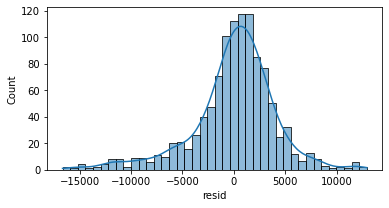

In [93]:
plt.figure(figsize = (6,3))
sns.histplot(result.resid, kde=True)

Al hallar los componentes de la serie, podemos observar que la tendencia es a disminuir la cantidad de pasos, con un ciclo estacional semanal y con un ruido que aunque tiene una forma que se asemeja a una distribución normal, está un poco asimetrica por lo que no podemos confirmar que se trata de ruido blanco

## 3. Autocorrelación

In [94]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

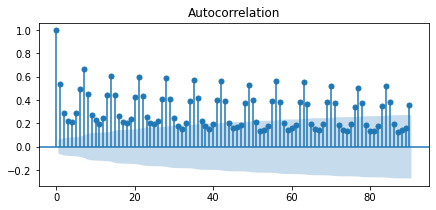

In [95]:
nlags =  30*3
fig, ax = plt.subplots(figsize=(7, 3))
plot_acf(diario.cantidad_pasos, ax=ax, lags=nlags)
plt.show()

En esta gráfica se puede observar una correlación significativa en los desfaces hasta el lag 30 que disminuye muy levemente con el pasar de los desfases.

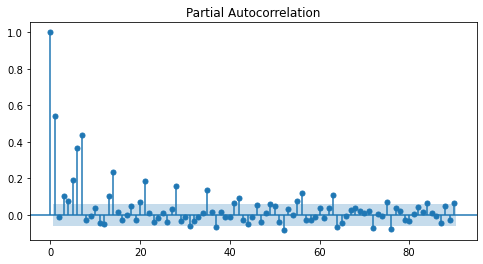

In [96]:
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(8, 4))
plot_pacf(diario, ax=ax, lags=nlags)
plt.show()

## 4. Evaluar la estacionalidad

Valor p> 0.05: No se rechaza la hipótesis nula (H0), los datos tienen una raíz unitaria y no son estacionarios.

valor p <= 0.05: Rechaza la hipótesis nula (H0), los datos no tienen raíz unitaria y son estacionarios

In [97]:
#Augmented Dickey-Fuller test 
from statsmodels.tsa.stattools import adfuller
X = diario.cantidad_pasos
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.643306
p-value: 0.460534
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


como el p-value es mayor a 0.05 podemos comcluir que la serie no es estacionaria, por lo cual no se pueden aplicar modelos autoregresivos

### 5. Predicción a Futuro
#### 5.1. One-Step Prediction

In [36]:
senial = diario.cantidad_pasos
senial.head()

fecha
2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
Freq: D, Name: cantidad_pasos, dtype: float64

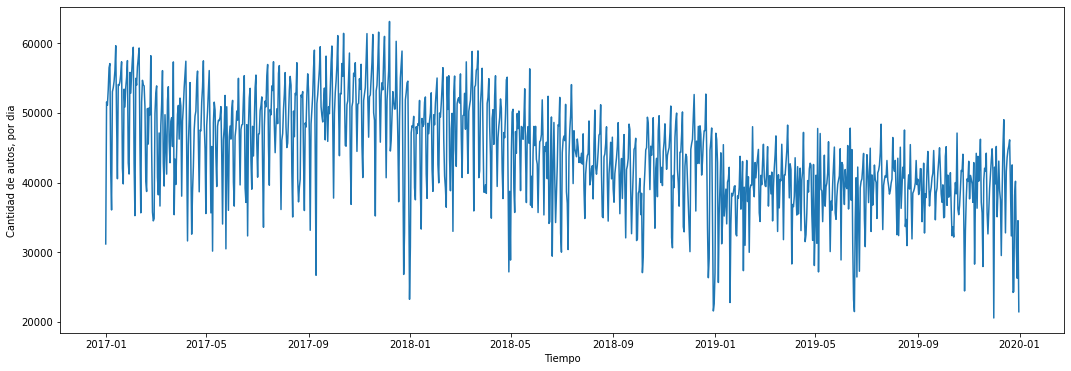

In [37]:
plt.figure(figsize = (18,6))
plt.plot(senial.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [38]:
senial.tail()

fecha
2019-12-27    40182.0
2019-12-28    30681.0
2019-12-29    26259.0
2019-12-30    34523.0
2019-12-31    21447.0
Freq: D, Name: cantidad_pasos, dtype: float64

Defino un look back de 3 meses

In [39]:
look_back = 30*3

In [40]:
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1004, 90) (1004,)


In [41]:
for i in range(X.shape[0]):
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [42]:
print(X)

[[31183. 51568. 51093. ... 51074. 46235. 52127.]
 [51568. 51093. 53332. ... 46235. 52127. 50995.]
 [51093. 53332. 56486. ... 52127. 50995. 38045.]
 ...
 [38348. 37170. 39669. ... 24349. 38168. 40182.]
 [37170. 39669. 34943. ... 38168. 40182. 30681.]
 [39669. 34943. 35054. ... 40182. 30681. 26259.]]


In [43]:
print(y)

[50995. 38045. 48833. ... 30681. 26259. 34523.]


In [44]:
N_train = 1004 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 90 #cantidad de puntos que vamos a usar para evaluar, el problema nos solicita el ultimo trimestre de 2019
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(914, 90) (914,)
(90, 90) (90,)


## Primer modelo - Random Forest

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42, n_jobs = -1).fit(X_train,y_train)

### ¿Qué información está usando el modelo para predecir?

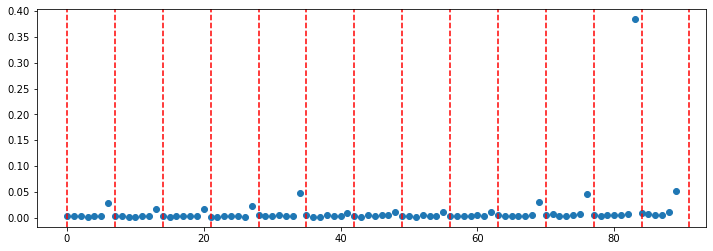

In [46]:
plt.figure(figsize = (12,4))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
for x in np.arange(14)*7:
    plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

En el anterior gráfivo podemos observar que el valor anterior al que se va a predecir, es muy importante para el modelo, se evidencia este patron en la mayoría de lags, sobretodo en los primeros 30 días y en los ultimos 20.

In [47]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

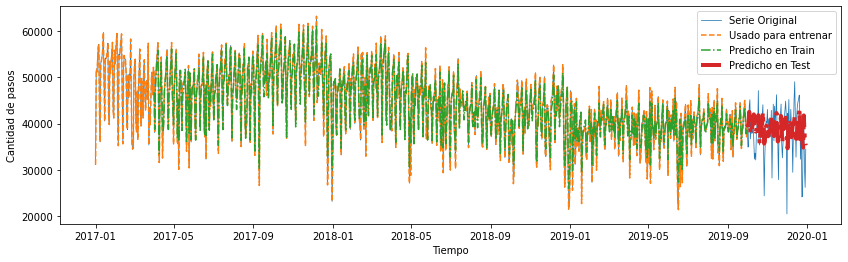

In [48]:
plt.figure(figsize=(14,4))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

Elegí la métrica de RMSE teniendo en cuenta que es una de las más utilizadas para evaluar si el regresor está prediciendo bien, adicionalmente es una métrica más sensible a valores atípicos, y como se observó en el EDA esta base de datos tiene muchos valores atípicos. Adicionalmente:
* Un valor bajo de RMSE indica un mejor resultado.
* RMSE es una buena medida de la precisión con que el modelo predice la respuesta.
* Es el criterio más importante para ajustar si el propósito principal del modelo es la predicción.
* la función de pérdida definida en términos de RMSE es fácilmente diferenciable y facilita la realización de operaciones matemáticas.

https://medium.com/usf-msds/choosing-the-right-metric-for-machine-learning-models-part-1-a99d7d7414e4
https://aprendeia.com/evaluando-el-error-en-los-modelos-de-regresion/

In [49]:
MSE_train = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE_train))

MSE_test = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE_test))

Error en Train: 1709.4716178647802
Error en Test: 4912.719832671669


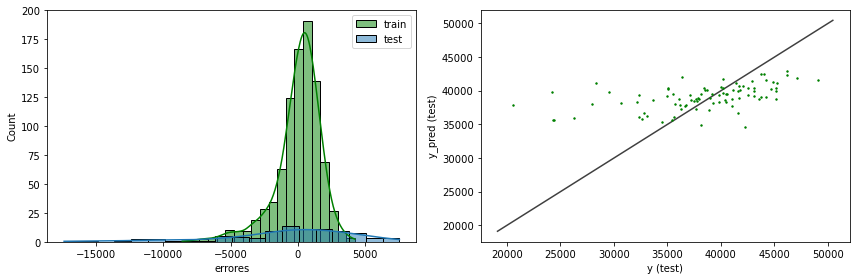

In [51]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.histplot(y_train - y_train_pred, bins = 20, label = 'train', color='g',kde=True)
sns.histplot(y_test - y_test_pred, bins = 20, label = 'test', kde=True)
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2,c='g')
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

En la gráfica de valor predicho vs valor real, se observa que el modelo concentra sus predicciones en un rango de valores que comprende entre los 33.000 aprox y los 43.000, esto posiblemente influeciado por los valores con los que se entrenó el modelo, como la tendendecia es a la baja, los valores de entrenamiento son menores a los valores de test

### Optimización de hiperparametros para el RandomForest

In [52]:
import scipy as sp

In [53]:
# Grilla para Random Search
parameters_rf = {'max_depth':sp.stats.randint(3, 30),
              'n_estimators':sp.stats.randint(1, 600)}

In [54]:
from sklearn.model_selection import RandomizedSearchCV

r_search_rf = RandomizedSearchCV(rf, parameters_rf,n_iter=20, random_state=42, cv=5)
r_search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DE0288AC40>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DE0269A3A0>},
                   random_state=42)

In [55]:
print("Mejores parametros: "+str(r_search_rf.best_params_))
print("Mejor Score: "+str(r_search_rf.best_score_)+'\n')

Mejores parametros: {'max_depth': 13, 'n_estimators': 459}
Mejor Score: 0.35118467911737067



In [56]:
y_train_pred_rf_opt = r_search_rf.predict(X_train)
y_test_pred_rf_opt = r_search_rf.predict(X_test)

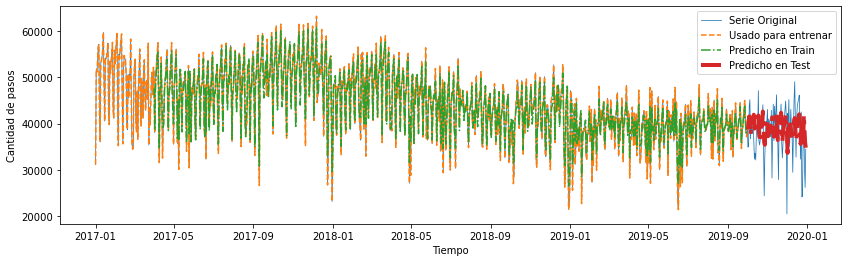

In [57]:
plt.figure(figsize=(14,4))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred_rf_opt,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_rf_opt,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

In [58]:
MSE_rf_opt_train = mean_squared_error(y_train, y_train_pred_rf_opt)
print('Error en Train:',np.sqrt(MSE_rf_opt_train))

MSE_rf_opt_test = mean_squared_error(y_test, y_test_pred_rf_opt)
print('Error en Test:',np.sqrt(MSE_rf_opt_test))

Error en Train: 1743.131545636557
Error en Test: 4914.5190908437135


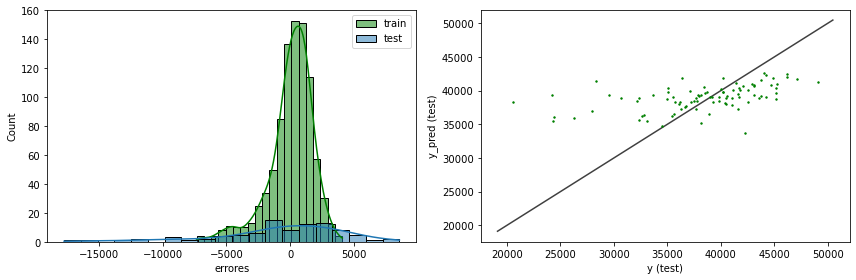

In [59]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.histplot(y_train - y_train_pred_rf_opt, bins = 20, label = 'train', color='g',kde=True)
sns.histplot(y_test - y_test_pred_rf_opt, bins = 20, label = 'test', kde=True)
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_rf_opt, s =2,c='g')
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

## Modelo Benchmark

Para tomar un modelo de referencia, predecimos el ultimo trimestre de 2019, tomando el valor anterior para predecir el valor actual lo cual desplazará la serie en una unidad.

In [60]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

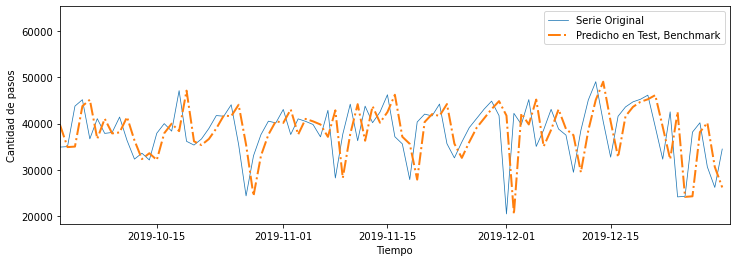

In [61]:
plt.figure(figsize=(12,4))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(senial.index[N_train+look_back], senial.index[length_total])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

In [62]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
MSE = mean_squared_error(y_test, y[-1 + N_train:N_train+N_test - 1])
print(np.sqrt(MSE))

6879.846077089548


El valor de RMSE en el modelo benchmark es superior al obtenido en los modelos anteriores, por lo cual se evidencia que son un poco más acertados en su predicción.

<Figure size 864x360 with 0 Axes>

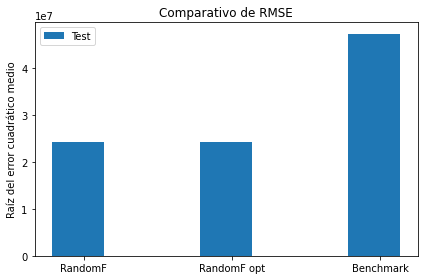

In [64]:
plt.figure(2, figsize=(12, 5))

labels = ['RandomF', 'RandomF opt', 'Benchmark']
Resultados_Test = [MSE_test, MSE_rf_opt_test, MSE]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/9, Resultados_Test, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Raíz del error cuadrático medio')
ax.set_title('Comparativo de RMSE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

Al comparar el resultado de los modelos en test, observamos que el de mejor desempeño es por poco el RandomForest sin optimizar y con los hiperparametros por defecto.

## Predicción 2020

In [114]:
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')

In [115]:
data_2020.head()

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.0
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.0
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.0
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.0


In [116]:
print(data_2020['estacion'].unique())

['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']


In [117]:
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask_2 = np.logical_and(data_2020.estacion=='ILLIA', data_2020.forma_pago == 'Efectivo')
data_2020 = data_2020[mask_2]

#Quitamos las columnas que no vamos a utilizar
data_2020.drop(columns = ['periodo','mes','dia_fecha','hora_inicio','forma_pago','observacion','estacion'], inplace = True)

data_2020.head()

,fecha,dia,hora_fin,tipo_vehiculo,sentido,cantidad_pasos
52,2020-01-01 00:00:00,Miércoles,1.0,Auto,Centro,326.0
53,2020-01-01 00:00:00,Miércoles,1.0,Auto,Provincia,319.0
134,2020-01-01 00:00:00,Miércoles,2.0,Auto,Centro,199.0
135,2020-01-01 00:00:00,Miércoles,2.0,Auto,Provincia,180.0
202,2020-01-01 00:00:00,Miércoles,3.0,Auto,Centro,114.0


In [118]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
data_2020['fecha2'] = pd.to_datetime(data_2020.fecha) + pd.to_timedelta(data_2020.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
data_2020.drop(columns=['fecha','hora_fin'], inplace = True)

data_2020.head()

,dia,tipo_vehiculo,sentido,cantidad_pasos,fecha2
52,Miércoles,Auto,Centro,326.0,2020-01-01 01:00:00
53,Miércoles,Auto,Provincia,319.0,2020-01-01 01:00:00
134,Miércoles,Auto,Centro,199.0,2020-01-01 02:00:00
135,Miércoles,Auto,Provincia,180.0,2020-01-01 02:00:00
202,Miércoles,Auto,Centro,114.0,2020-01-01 03:00:00


In [119]:
#Corregimos el nombre de fecha2 a fecha
data_2020.rename(columns = {'fecha2':'fecha'}, inplace = True) 
data_2020.head()

,dia,tipo_vehiculo,sentido,cantidad_pasos,fecha
52,Miércoles,Auto,Centro,326.0,2020-01-01 01:00:00
53,Miércoles,Auto,Provincia,319.0,2020-01-01 01:00:00
134,Miércoles,Auto,Centro,199.0,2020-01-01 02:00:00
135,Miércoles,Auto,Provincia,180.0,2020-01-01 02:00:00
202,Miércoles,Auto,Centro,114.0,2020-01-01 03:00:00


In [120]:
#Reordenamos el dataset por fecha
data_2020.sort_values('fecha', inplace = True)
data_2020.reset_index(drop=True, inplace = True)
data_2020.head()

,dia,tipo_vehiculo,sentido,cantidad_pasos,fecha
0,Miércoles,Moto,Centro,7.0,2020-01-01
1,Miércoles,Auto,Provincia,423.0,2020-01-01
2,Miércoles,Auto,Centro,467.0,2020-01-01
3,Miércoles,Moto,Provincia,6.0,2020-01-01
4,Miércoles,Pesados 2 Ejes,Centro,1.0,2020-01-01


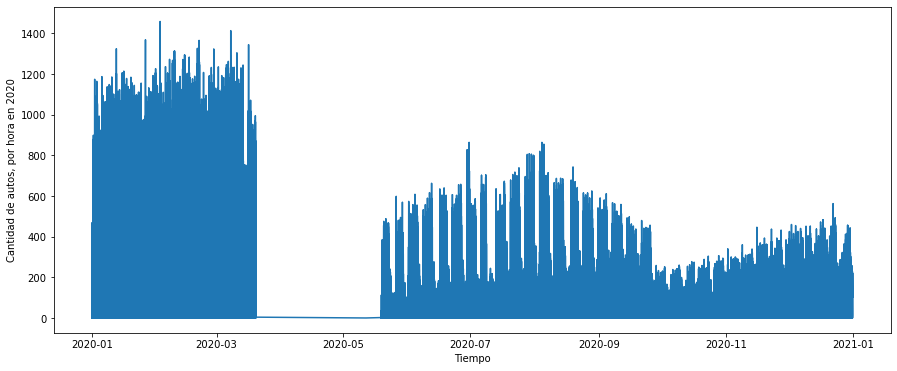

In [121]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(data_2020.fecha, data_2020.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora en 2020')
plt.show()

In [122]:
data_2020 = data_2020.reindex(columns=['dia','sentido','tipo_vehiculo','cantidad_pasos','fecha'])

In [123]:
data_2020.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Miércoles,Centro,Moto,7.0,2020-01-01
1,Miércoles,Provincia,Auto,423.0,2020-01-01
2,Miércoles,Centro,Auto,467.0,2020-01-01
3,Miércoles,Provincia,Moto,6.0,2020-01-01
4,Miércoles,Centro,Pesados 2 Ejes,1.0,2020-01-01


In [176]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_2020 = data_2020.resample('D', on = 'fecha').sum()
print(diario_2020.shape)
diario_2020.tail()

(366, 1)


,cantidad_pasos
fecha,
2020-12-27,8434.0
2020-12-28,10311.0
2020-12-29,12036.0
2020-12-30,12527.0
2020-12-31,6553.0


In [177]:
dataset_completo_2020 = pd.concat([diario, diario_2020])
dataset_completo_2020

,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-02,51568.0
2017-01-03,51093.0
2017-01-04,53332.0
2017-01-05,56486.0
...,...
2020-12-27,8434.0
2020-12-28,10311.0
2020-12-29,12036.0


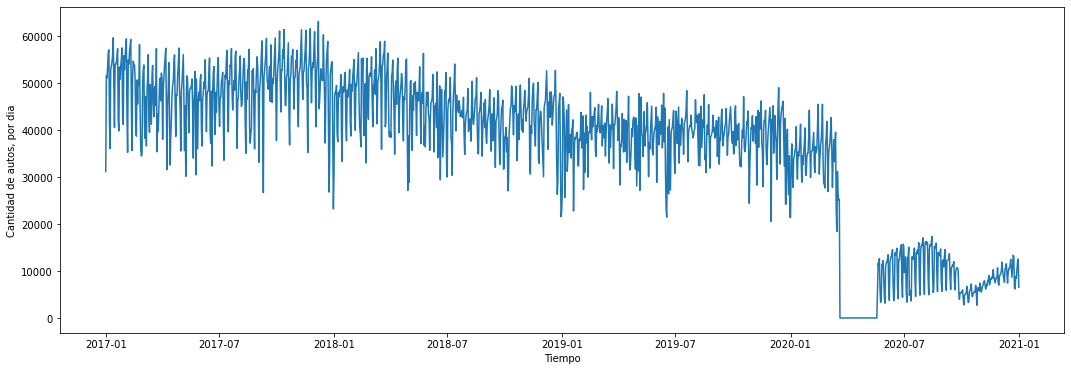

In [180]:
plt.figure(figsize = (18,6))
plt.plot(dataset_completo_2020.index, dataset_completo_2020.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

### 5. Predicción a Futuro
#### 5.1. One-Step Prediction

In [191]:
senial_2 = dataset_completo_2020.cantidad_pasos
senial_2.head()
senial_2.shape

(1461,)

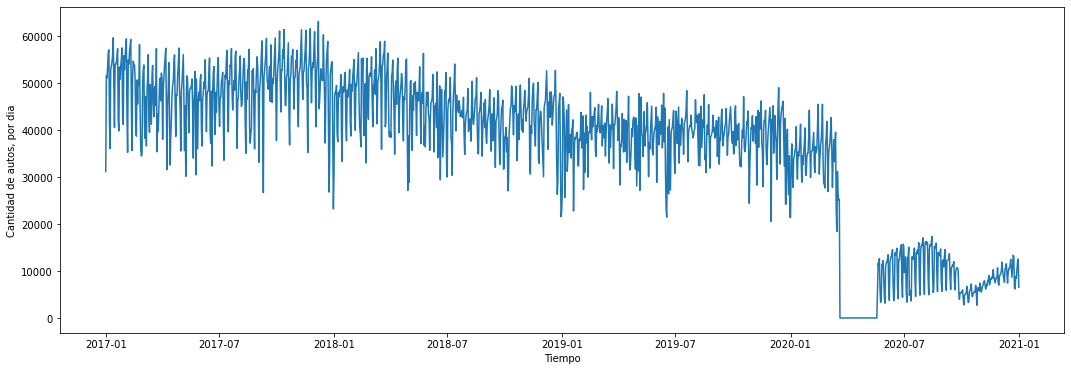

In [182]:
plt.figure(figsize = (18,6))
plt.plot(senial_2.index, dataset_completo_2020.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [131]:
look_back_2 = 30*3

In [183]:
N_2 = senial_2.shape[0]
X_2 = np.zeros((N_2 - look_back_2 - 1,look_back_2))
y_2 = np.zeros(N_2 - look_back_2 - 1)
print(X_2.shape, y_2.shape)

(1370, 90) (1370,)


In [184]:
for i in range(X_2.shape[0]):
    X_2[i,:] = senial_2.iloc[i:i+look_back_2]
    y_2[i] = senial_2.iloc[i+look_back_2]

In [185]:
print(X_2)

[[31183. 51568. 51093. ... 51074. 46235. 52127.]
 [51568. 51093. 53332. ... 46235. 52127. 50995.]
 [51093. 53332. 56486. ... 52127. 50995. 38045.]
 ...
 [ 5369.  5432.  5431. ...  6172.  8840.  8434.]
 [ 5432.  5431.  5982. ...  8840.  8434. 10311.]
 [ 5431.  5982.  4223. ...  8434. 10311. 12036.]]


In [186]:
print(y_2)

[50995. 38045. 48833. ... 10311. 12036. 12527.]


In [192]:
N_train_2 = 37*30 - look_back_2 # cantidad de instancias que vamos a usar para entrenar. 
N_test_2 = 350 #cantidad de puntos que vamos a usar para evaluar
N_total_2 = N_train_2 + N_test_2

length_total_2 = N_train_2 + N_test_2 + look_back_2

X_train_2 = X_2[:N_train_2,:]
y_train_2 = y_2[:N_train_2]
print(X_train_2.shape, y_train_2.shape)

X_test_2 = X_2[N_train_2:N_train_2+N_test_2,:]
y_test_2 = y_2[N_train_2:N_train_2+N_test_2]
print(X_test_2.shape, y_test_2.shape)

(1020, 90) (1020,)
(350, 90) (350,)


In [193]:
y_pred_2 = rf.predict(X_2)
y_train_pred_2 = rf.predict(X_train_2)
y_test_pred_2 = rf.predict(X_test_2)

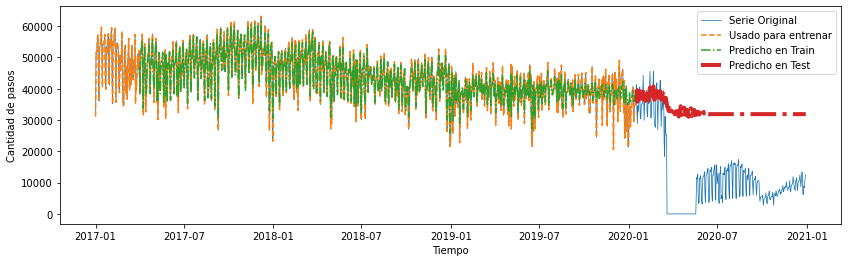

In [194]:
plt.figure(figsize=(14,4))
plt.plot(senial_2.index[:length_total_2], senial_2[:length_total_2],lw = 0.75, label = 'Serie Original')
plt.plot(senial_2.index[:N_train_2 + look_back_2], senial_2[:N_train_2 + look_back_2],'--', label = 'Usado para entrenar')
plt.plot(senial_2.index[look_back_2: look_back_2 + N_train_2], y_train_pred_2,'-.',label = 'Predicho en Train')
plt.plot(senial_2.index[N_train_2+look_back_2: length_total_2], y_test_pred_2,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

In [195]:
MSE_completo = mean_squared_error(y_train_2, y_train_pred_2)
print('Error en Train:',np.sqrt(MSE_completo))

MSE_completo = mean_squared_error(y_test_2, y_test_pred_2)
print('Error en Test:',np.sqrt(MSE_completo))

Error en Train: 2323.513845878209
Error en Test: 22801.712162621738


## Multi-Step Prediction

Con el modelo ya entrenado, vamos a usar el método recursivo para hacer Multi-Step prediction.

In [196]:
y_ms_test_pred = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = rf.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

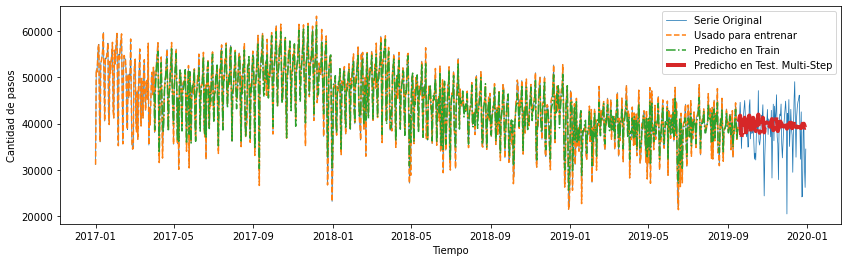

In [197]:
plt.figure(figsize=(14,4))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_ms_test_pred,'-.', lw = 4, label = 'Predicho en Test. Multi-Step')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

Y calculamos el error RMSE

In [198]:
MSE_ms = mean_squared_error(y_test, y_ms_test_pred)
print('Error en Train:',np.sqrt(MSE_ms))

Error en Train: 5081.806013978559


### Parte C - Investigación

Me interesaría probar con un tipo de división de train y test que sea tipo ventana deslizante, en donde se entrene con ventanas pequeñas de la serie y no con una gran ventana, porque debido a que la tendencia en 2017 es positiva y luego en 2018 la tendencia es negativa, pienso que influye en que el resultado de la predicción no sea tan acertada.

https://towardsdatascience.com/time-series-machine-learning-regression-framework-9ea33929009a

Tambien pienso que se puede intentar sacarle la tendencia a la serie y entrenar el modelo de nuevo, para observar si mejora.

Con estas implementaciones espero que el modelo se entrene con mayor información, que reconozca valores más alejados de la media y que sin el elemento de tendencia puede mejorar la predicción en test.